# Tensorflow 2.x 버전 처음 시행하기

<table class="tfo-notebook-buttons" align="left">
   <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/text/blob/master/docs/tutorials/text_classification_rnn.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# Hypothesis and Cost
### Hypothesis 
$$ H(x) = Wx + b $$


### Cost
$$ cost(W)=\frac { 1 }{ m } \sum _{i=1}^{m}{ { (W{ x }^{ i }-y^{ i } })^{ 2 } }  $$

우선 cost function은 정답과 예측의 차이의 제곱의 평균으로 만들어서 계산 할 것이다


## 케라스로 구현하는 선형 회귀

In [1]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.5.0


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [3]:
X=np.array([1,2,3,4,5,6,7,8,9])          # 공부하는 시간
y=np.array([12,25,50,42,61, 67, 79, 85, 90]) # 각 공부하는 시간에 맵핑되는 성적

In [4]:
model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))

In [5]:
# sgd는 경사 하강법을 의미. 학습률(learning rate, lr)은 0.01.
sgd = optimizers.SGD(lr=0.01)

C:\Users\admin\anaconda3\envs\tf2-cpu\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


## 회귀에서 
- 손실함수는 오차 MSE을 주로 사용한다.

In [6]:
# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer=sgd ,loss='mse',metrics=['mse'])

In [7]:
# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.
history=model.fit(X,y, batch_size=1, epochs=30, shuffle=False)

Epoch 1/30
9/9 [==============================] - 0s 750us/step - loss: 485.1043 - mse: 485.1043
Epoch 2/30
9/9 [==============================] - 0s 875us/step - loss: 49.3681 - mse: 49.3681
Epoch 3/30
9/9 [==============================] - 0s 751us/step - loss: 48.6626 - mse: 48.6626
Epoch 4/30
9/9 [==============================] - 0s 1ms/step - loss: 48.0098 - mse: 48.0098
Epoch 5/30
9/9 [==============================] - 0s 618us/step - loss: 47.4057 - mse: 47.4057
Epoch 6/30
9/9 [==============================] - 0s 1ms/step - loss: 46.8473 - mse: 46.8473
Epoch 7/30
9/9 [==============================] - 0s 746us/step - loss: 46.3312 - mse: 46.3312
Epoch 8/30
9/9 [==============================] - 0s 872us/step - loss: 45.8546 - mse: 45.8546
Epoch 9/30
9/9 [==============================] - 0s 868us/step - loss: 45.4146 - mse: 45.4146
Epoch 10/30
9/9 [==============================] - 0s 619us/step - loss: 45.0087 - mse: 45.0087
Epoch 11/30
9/9 [==============================] - 

In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt

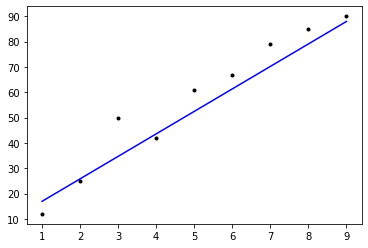

In [10]:
plt.plot(X, model.predict(X), 'b', X,y, 'k.')

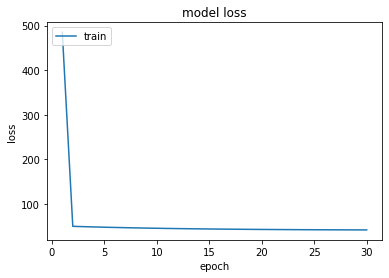

In [11]:
epochs = range(1, len(history.history['mse']) + 1)
plt.plot(epochs, history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()